<a href="https://colab.research.google.com/github/suriya43426/SuperAI_-_Convolutional_Neural_Network/blob/master/masterproject_fine_tuning_model_suriyac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/sugar-crystal-dataset-v3/sugar_dataset_kaggle_v3'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [ ]:
class_names = ['unsaturated','metastable','intermediate', 'labile']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [ ]:
def load_data():
    
    datasets = ['../input/sugar-crystal-v2/sugar_dataset_kaggle_v2/train', '../input/sugar-crystal-v2/sugar_dataset_kaggle_v2/test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  2%|▏         | 3/200 [00:00<00:07, 25.00it/s]

Loading ../input/sugar-crystal-v2/sugar_dataset_kaggle_v2/train


  8%|▊         | 4/50 [00:00<00:01, 32.89it/s]

Loading ../input/sugar-crystal-v2/sugar_dataset_kaggle_v2/test


100%|██████████| 50/50 [00:01<00:00, 31.07it/s]


In [ ]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 800
Number of testing examples: 200
Each image is of size: (150, 150)


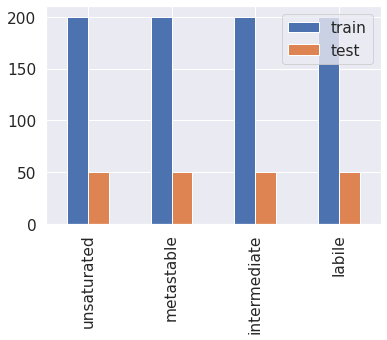

In [ ]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

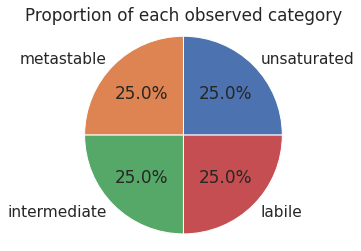

In [ ]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0), 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [ ]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

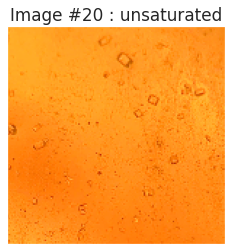

In [ ]:
display_random_image(class_names, train_images, train_labels)

In [ ]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

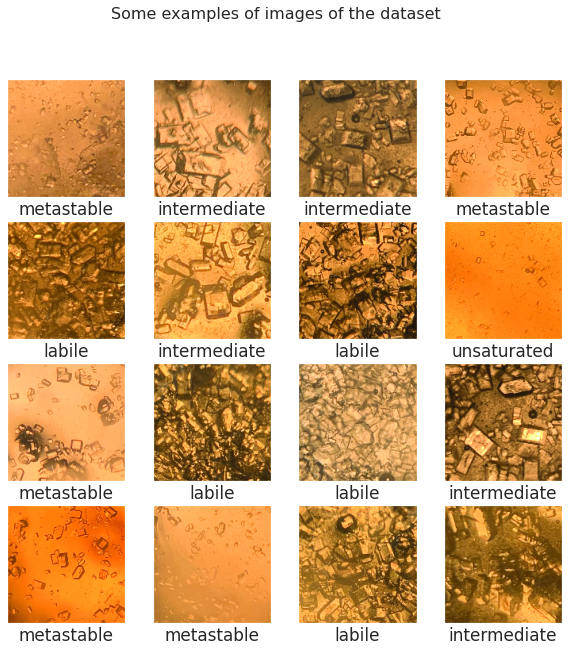

In [ ]:
display_examples(class_names, train_images, train_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
5/5 [==============================] - 7s 1s/step - loss: 2.7287 - accuracy: 0.2438 - val_loss: 2.0751 - val_accuracy: 0.2188
Epoch 2/20
5/5 [==============================] - 8s 2s/step - loss: 1.5798 - accuracy: 0.2781 - val_loss: 1.3384 - val_accuracy: 0.3812
Epoch 3/20
5/5 [==============================] - 8s 2s/step - loss: 1.2747 - accuracy: 0.4219 - val_loss: 1.2583 - val_accuracy: 0.4437
Epoch 4/20
5/5 [==============================] - 7s 1s/step - loss: 1.1453 - accuracy: 0.5063 - val_loss: 1.0999 - val_accuracy: 0.4875
Epoch 5/20
5/5 [==============================] - 7s 1s/step - loss: 1.0043 - accuracy: 0.5281 - val_loss: 1.0689 - val_accuracy: 0.4938
Epoch 6/20
5/5 [==============================] - 7s 1s/step - loss: 0.8832 - accuracy: 0.6078 - val_loss: 1.0367 - val_accuracy: 0.5125
Epoch 7/20
5/5 [==============================] - 8s 2s/step - loss: 0.7997 - accuracy: 0.6578 - val_loss: 0.8957 - val_accuracy: 0.5750
Epoch 8/20
5/5 [=========================

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

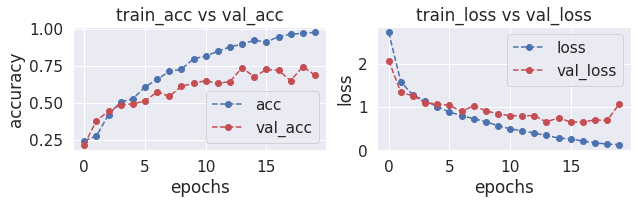

In [ ]:
plot_accuracy_loss(history)

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

7/7 [==============================] - 1s 86ms/step - loss: 2.6440 - accuracy: 0.4500


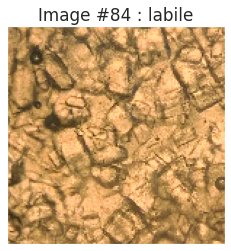

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [ ]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

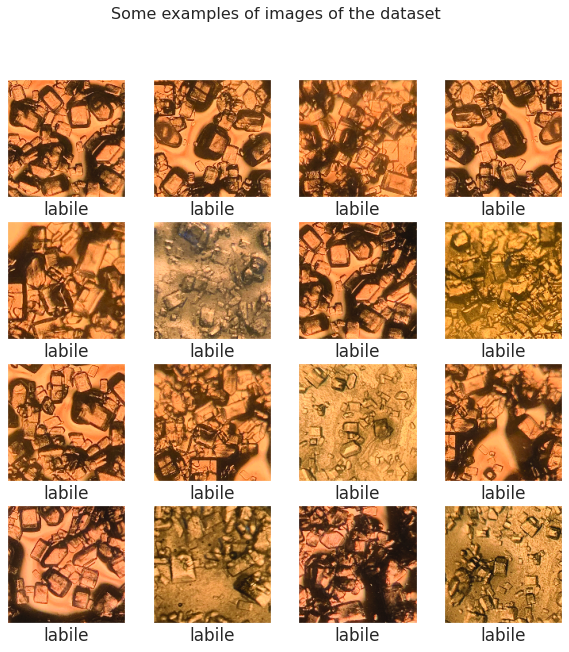

In [ ]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

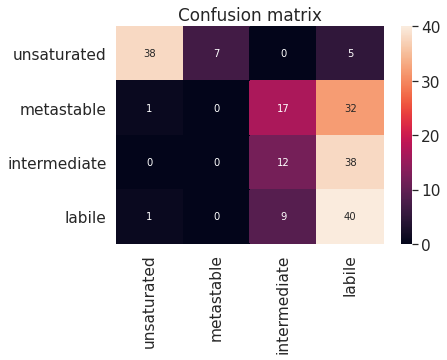

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

## Feature extraction with ImageNet

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [ ]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

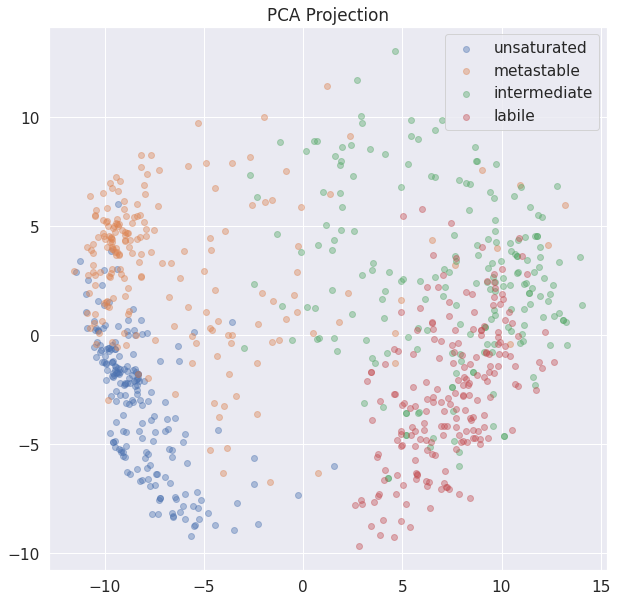

In [ ]:
### Figures

plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

## Training on custom top of ImageNet

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Epoch 1/15
5/5 [==============================] - 0s 30ms/step - loss: 1.1539 - accuracy: 0.4656 - val_loss: 0.6992 - val_accuracy: 0.6313
Epoch 2/15
5/5 [==============================] - 0s 13ms/step - loss: 0.4321 - accuracy: 0.8266 - val_loss: 0.5062 - val_accuracy: 0.7875
Epoch 3/15
5/5 [==============================] - 0s 13ms/step - loss: 0.3093 - accuracy: 0.8641 - val_loss: 0.3059 - val_accuracy: 0.8813
Epoch 4/15
5/5 [==============================] - 0s 13ms/step - loss: 0.2191 - accuracy: 0.9156 - val_loss: 0.2690 - val_accuracy: 0.8938
Epoch 5/15
5/5 [==============================] - 0s 13ms/step - loss: 0.1681 - accuracy: 0.9266 - val_loss: 0.2572 - val_accuracy: 0.8813
Epoch 6/15
5/5 [==============================] - 0s 13ms/step - loss: 0.1512 - accuracy: 0.9500 - val_loss: 0.2462 - val_accuracy: 0.9062
Epoch 7/15
5/5 [==============================] - 0s 13ms/step - loss: 0.1184 - accuracy: 0.9609 - val_loss: 0.1997 - val_accuracy: 0.9187
Epoch 8/15
5/5 [===========

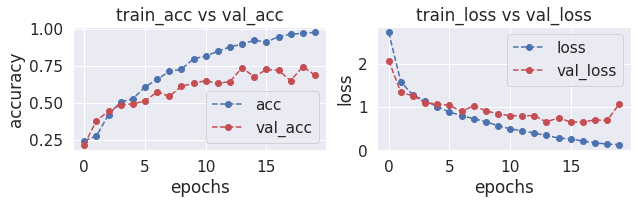

In [ ]:
plot_accuracy_loss(history)

In [ ]:
test_loss = model2.evaluate(test_features, test_labels)

7/7 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8250


In [ ]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 10
# Proporition of samples to use to train each training
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

In [ ]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store model
    models.append(model)

In [ ]:
histories = []

for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=128, epochs=10, validation_split = 0.1))

Epoch 1/10
5/5 [==============================] - 0s 30ms/step - loss: 0.9045 - accuracy: 0.6701 - val_loss: 0.4194 - val_accuracy: 0.8750
Epoch 2/10
5/5 [==============================] - 0s 14ms/step - loss: 0.3069 - accuracy: 0.8958 - val_loss: 0.3160 - val_accuracy: 0.8750
Epoch 3/10
5/5 [==============================] - 0s 13ms/step - loss: 0.1841 - accuracy: 0.9306 - val_loss: 0.1748 - val_accuracy: 0.9219
Epoch 4/10
5/5 [==============================] - 0s 13ms/step - loss: 0.1208 - accuracy: 0.9635 - val_loss: 0.1396 - val_accuracy: 0.9375
Epoch 5/10
5/5 [==============================] - 0s 13ms/step - loss: 0.0845 - accuracy: 0.9688 - val_loss: 0.1013 - val_accuracy: 0.9688
Epoch 6/10
5/5 [==============================] - 0s 13ms/step - loss: 0.0625 - accuracy: 0.9792 - val_loss: 0.1055 - val_accuracy: 0.9531
Epoch 7/10
5/5 [==============================] - 0s 13ms/step - loss: 0.0536 - accuracy: 0.9861 - val_loss: 0.0762 - val_accuracy: 0.9688
Epoch 8/10
5/5 [===========

Epoch 10/10
5/5 [==============================] - 0s 12ms/step - loss: 0.0382 - accuracy: 0.9948 - val_loss: 0.0914 - val_accuracy: 0.9844
Epoch 1/10
5/5 [==============================] - 0s 29ms/step - loss: 1.4101 - accuracy: 0.5365 - val_loss: 0.8480 - val_accuracy: 0.6094
Epoch 2/10
5/5 [==============================] - 0s 13ms/step - loss: 0.5041 - accuracy: 0.8090 - val_loss: 0.3661 - val_accuracy: 0.8125
Epoch 3/10
5/5 [==============================] - 0s 13ms/step - loss: 0.2960 - accuracy: 0.8854 - val_loss: 0.2003 - val_accuracy: 0.9531
Epoch 4/10
5/5 [==============================] - 0s 13ms/step - loss: 0.2019 - accuracy: 0.9340 - val_loss: 0.1350 - val_accuracy: 0.9531
Epoch 5/10
5/5 [==============================] - 0s 13ms/step - loss: 0.1265 - accuracy: 0.9635 - val_loss: 0.1110 - val_accuracy: 0.9688
Epoch 6/10
5/5 [==============================] - 0s 12ms/step - loss: 0.1065 - accuracy: 0.9670 - val_loss: 0.0931 - val_accuracy: 0.9688
Epoch 7/10
5/5 [==========

In [ ]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.845


In [ ]:
from keras.models import Model

model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [ ]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [ ]:
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

model2 = VGG16(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
layer_input = Input(shape = (9, 9, 512)) # a new input tensor to be able to feed the desired layer


x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(4,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [ ]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 9, 9, 512)]       0         
_________________________________________________________________
block5_conv1 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv2 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          294976    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0   

In [ ]:
history = new_model.fit(train_features, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
5/5 [==============================] - 14s 3s/step - loss: 1.3836 - accuracy: 0.4547 - val_loss: 1.3574 - val_accuracy: 0.6125
Epoch 2/10
5/5 [==============================] - 14s 3s/step - loss: 0.9146 - accuracy: 0.6938 - val_loss: 0.5720 - val_accuracy: 0.7688
Epoch 3/10
5/5 [==============================] - 13s 3s/step - loss: 0.3898 - accuracy: 0.8516 - val_loss: 0.2806 - val_accuracy: 0.8938
Epoch 4/10
5/5 [==============================] - 14s 3s/step - loss: 0.4157 - accuracy: 0.8875 - val_loss: 0.4702 - val_accuracy: 0.8500
Epoch 5/10
5/5 [==============================] - 14s 3s/step - loss: 0.2401 - accuracy: 0.9141 - val_loss: 0.3122 - val_accuracy: 0.8938
Epoch 6/10
5/5 [==============================] - 13s 3s/step - loss: 0.1749 - accuracy: 0.9344 - val_loss: 0.1892 - val_accuracy: 0.9250
Epoch 7/10
5/5 [==============================] - 13s 3s/step - loss: 0.1141 - accuracy: 0.9500 - val_loss: 0.2416 - val_accuracy: 0.9312
Epoch 8/10
5/5 [==================

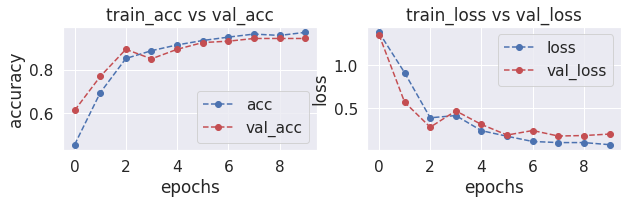

In [ ]:
plot_accuracy_loss(history)

In [ ]:
from sklearn.metrics import accuracy_score

predictions = new_model.predict(test_features)    
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.83
